In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/tkseneee/Dataset/master/GDP_Country.csv')

In [3]:
data.head()

,Country,Region,Population,Area_sqm,Pop_Density_per sqm,Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [4]:
data=data.drop(['Country','Region'],1)

In [5]:
from sklearn.impute import KNNImputer
fill_mod=KNNImputer(n_neighbors=3)
data_fill=fill_mod.fit_transform(data)
data_fill=pd.DataFrame(data_fill)
data_fill.columns=data.columns
data = data_fill

In [6]:
for i in data.columns:
    q1=data[i].quantile(0.25)
    q3=data[i].quantile(0.75)
    iqr=q3-q1
    ub=q3 + 1.5*iqr
    lb=q1 - 1.5*iqr
    data[i]=data[i].replace(data[data[i]>ub][i],data[i].quantile(0.99))
    data[i]=data[i].replace(data[data[i]<lb][i],data[i].quantile(0.01))

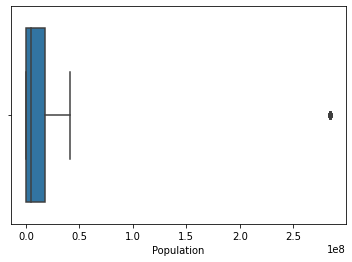

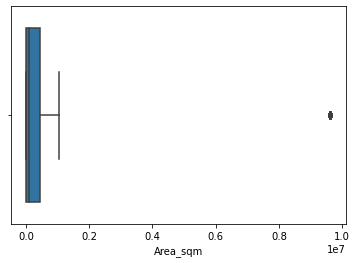

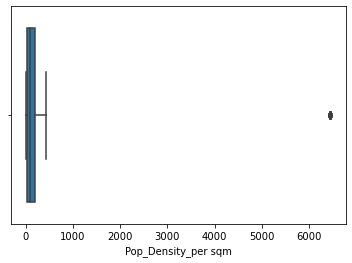

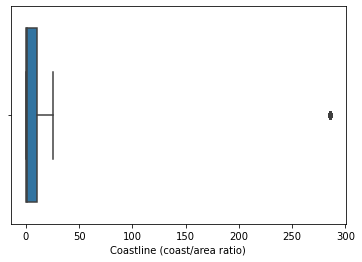

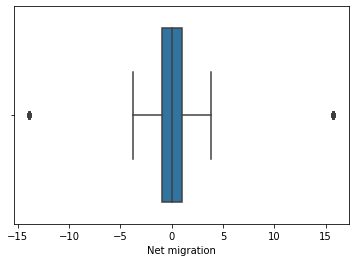

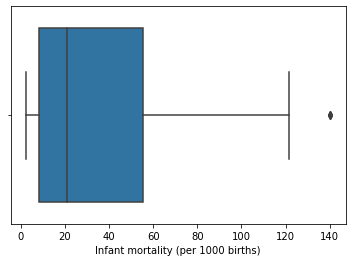

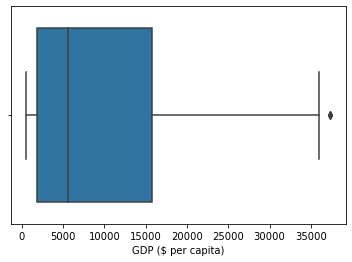

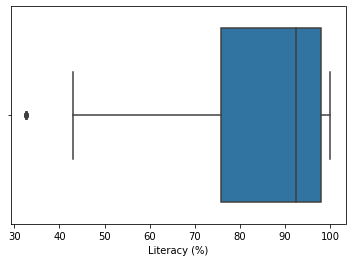

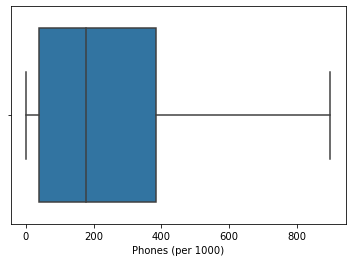

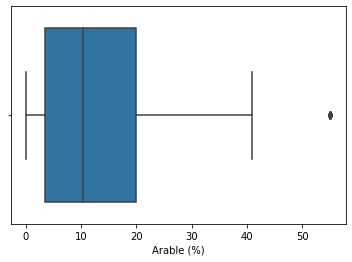

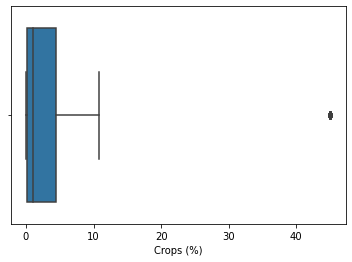

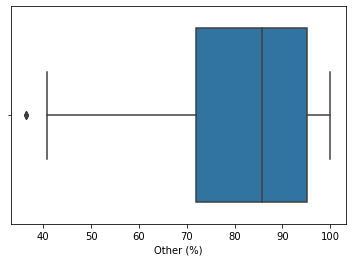

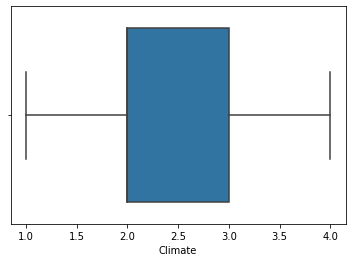

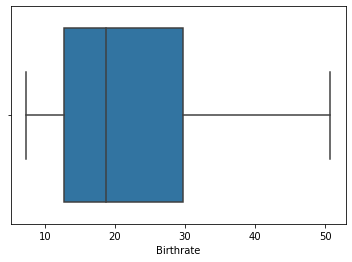

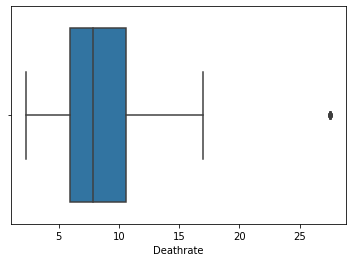

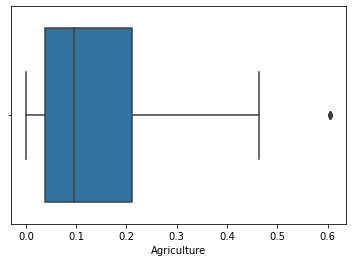

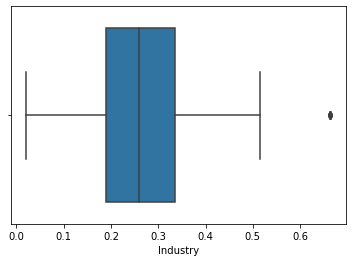

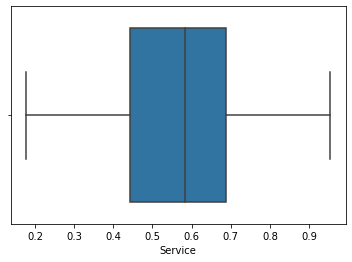

In [7]:
for i in data.columns:
    sb.boxplot(data[i])
    plt.show()

In [8]:
# Model Building
out=data['GDP ($ per capita)']
inp=data.drop('GDP ($ per capita)',axis=1)

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
inp_sc=sc.fit_transform(inp)
inp_sc=pd.DataFrame(inp_sc,columns=inp.columns)

In [10]:
import scipy.stats as stats
box_out,lam=stats.boxcox(out)

In [11]:
import statsmodels.api as sm
inp_c=sm.add_constant(inp_sc)
ols=sm.OLS(box_out,inp_c)
modv1=ols.fit()
modv1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     71.89
Date:                Fri, 02 Oct 2020   Prob (F-statistic):           2.01e-77
Time:                        16:24:18   Log-Likelihood:                -290.31
No. Observations:                 227   AIC:                             616.6
Df Residuals:                     209   BIC:                             678.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 12.1756      0.060    202.479      0.000      12.057      12.294
Population                             0.0234      0.071      0.327      0.744      -0.118       0.164
Area_sqm                               0.0389      0.072      0.542      0.588      -0.103       0.181
Pop_Density_per sqm                   -0.0397      0.070     -0.570      0.569      -0.177       0.098
Coastline (coast/area ratio)          -0.1139      0.080     -1.417      0.158      -0.272       0.045
Net migration                          0.2611      0.066      3.952      0.000       0.131       0.391
Infant mortality (per 1000 births)    -0.7015      0.185     -3.798      0.000      -1.066      -0.337
Literacy (%)                           0.0170      0.101      0.169      0.866      -0.182       0.216
Phones (per 1000)                      1.0162      0.107      9.459      0.000       0.804       1.228
Arable (%)                             0.2040      0.196      1.039      0.300      -0.183       0.591
Crops (%)                              0.1181      0.118      0.997      0.320      -0.115       0.352
Other (%)                              0.3864      0.228      1.695      0.092      -0.063       0.836
Climate                               -0.1602      0.077     -2.074      0.039      -0.313      -0.008
Birthrate                             -0.5332      0.150     -3.550      0.000      -0.829      -0.237
Deathrate                              0.2427      0.096      2.536      0.012       0.054       0.431
Agriculture                           -0.4969      0.259     -1.918      0.056      -1.008       0.014
Industry                              -0.0632      0.235     -0.269      0.788      -0.527       0.401
Service                               -0.2960      0.293     -1.009      0.314      -0.875       0.283
==============================================================================
Omnibus:                       26.099   Durbin-Watson:                   1.801
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.602
Skew:                          -0.773   Prob(JB):                     5.05e-08
Kurtosis:                       4.077   Cond. No.                         16.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [13]:
mod_lr = LinearRegression()
res = cross_val_score(mod_lr,inp_sc,box_out,cv=3,scoring='neg_mean_squared_error')
res

array([-1.00621301, -0.71620042, -0.95687388])

In [14]:
rmse = np.sqrt(abs(res))
be = np.mean(rmse)
ve = np.std(rmse)
cve = np.std(rmse)/np.mean(rmse)
res_lr = [be,ve,cve]
res_lr

[0.9425290840485627, 0.06880912752800417, 0.07300477904876923]

In [15]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [16]:
mod_rid = Ridge(alpha=1)
res = cross_val_score(mod_rid,inp_sc,box_out,cv=3,scoring='neg_mean_squared_error')
rmse = np.sqrt(abs(res))
be = np.mean(rmse)
ve = np.std(rmse)
cve = np.std(rmse)/np.mean(rmse)
res_ridge1 = [be,ve,cve]
res_ridge1

[0.9348545557152225, 0.06490105134353676, 0.0694236883660297]

In [17]:
mod_rid = Ridge(alpha=5)
res = cross_val_score(mod_rid,inp_sc,box_out,cv=3,scoring='neg_mean_squared_error')
rmse = np.sqrt(abs(res))
be = np.mean(rmse)
ve = np.std(rmse)
cve = np.std(rmse)/np.mean(rmse)
res_ridge5 = [be,ve,cve]
res_ridge5

[0.9296063516580398, 0.0626866004876801, 0.06743348985930732]

In [18]:
mod_lasso = Lasso(alpha=1)
res = cross_val_score(mod_lasso,inp_sc,box_out,cv=3,scoring='neg_mean_squared_error')
rmse = np.sqrt(abs(res))
be = np.mean(rmse)
ve = np.std(rmse)
cve = np.std(rmse)/np.mean(rmse)
res_lasso1 = [be,ve,cve]
res_lasso1

[1.517625490589963, 0.06307345087703509, 0.04156061641565855]

In [19]:
mod_lasso = Lasso(alpha=5)
res = cross_val_score(mod_lasso,inp_sc,box_out,cv=3,scoring='neg_mean_squared_error')
rmse = np.sqrt(abs(res))
be = np.mean(rmse)
ve = np.std(rmse)
cve = np.std(rmse)/np.mean(rmse)
res_lasso5 = [be,ve,cve]
res_lasso5

[2.276682838365352, 0.0670833949079792, 0.029465410718405017]

In [20]:
mod_lasso = Lasso(alpha=0.01)
res = cross_val_score(mod_lasso,inp_sc,box_out,cv=3,scoring='neg_mean_squared_error')
rmse = np.sqrt(abs(res))
be = np.mean(rmse)
ve = np.std(rmse)
cve = np.std(rmse)/np.mean(rmse)
res_lasso = [be,ve,cve]
res_lasso

[0.9323762223227243, 0.0639231440614294, 0.06855938893656559]

In [21]:
mod_enet = ElasticNet(alpha=5)
res = cross_val_score(mod_enet,inp_sc,box_out,cv=3,scoring='neg_mean_squared_error')
rmse = np.sqrt(abs(res))
be = np.mean(rmse)
ve = np.std(rmse)
cve = np.std(rmse)/np.mean(rmse)
res_enet5 = [be,ve,cve]
res_enet5

[2.276682838365352, 0.0670833949079792, 0.029465410718405017]

In [22]:
mod_enet = ElasticNet(alpha=0.1)
res = cross_val_score(mod_enet,inp_sc,box_out,cv=3,scoring='neg_mean_squared_error')
rmse = np.sqrt(abs(res))
be = np.mean(rmse)
ve = np.std(rmse)
cve = np.std(rmse)/np.mean(rmse)
res_enet = [be,ve,cve]
res_enet

[0.9415567737256386, 0.06581248193757451, 0.06989751842277298]

In [23]:
mod_enet = ElasticNet(alpha=0.008)
res = cross_val_score(mod_enet,inp_sc,box_out,cv=3,scoring='neg_mean_squared_error')
rmse = np.sqrt(abs(res))
be = np.mean(rmse)
ve = np.std(rmse)
cve = np.std(rmse)/np.mean(rmse)
res_enet = [be,ve,cve]
res_enet

[0.9325905777535589, 0.06332615900005995, 0.0679034943207352]

In [24]:
scorecard = pd.DataFrame()
scorecard['LR'] = res_lr
scorecard['Ridge_alpha_1'] = res_ridge1
scorecard['Ridge_alpha_5'] = res_ridge5
scorecard['Lasso_alpha_0.05'] = res_lasso
scorecard['ElasticNet_alpha_0.008'] = res_enet
scorecard.index = ['Bias Error','Variance Error','Coefficient of Variance']
scorecard

,LR,Ridge_alpha_1,Ridge_alpha_5,Lasso_alpha_0.05,ElasticNet_alpha_0.008
Bias Error,0.942529,0.934855,0.929606,0.932376,0.932591
Variance Error,0.068809,0.064901,0.062687,0.063923,0.063326
Coefficient of Variance,0.073005,0.069424,0.067433,0.068559,0.067903


In [25]:
from sklearn.linear_model import LinearRegression
mod_lr = LinearRegression()
mod_lr.fit(inp_sc,box_out)
coef = mod_lr.coef_
coef

array([ 0.02340154,  0.03892714, -0.03974502, -0.11390722,  0.26107305,
       -0.70154081,  0.01704978,  1.01619471,  0.20398756,  0.11808886,
        0.38644746, -0.16022048, -0.53321424,  0.24271729, -0.49691422,
       -0.06322358, -0.29602018])

In [26]:
coef1 = pd.DataFrame()
coef1['LR'] = coef

In [27]:
from sklearn.linear_model import Ridge
mod_ridge = Ridge(alpha=1)
mod_ridge.fit(inp_sc,box_out)
coef1['Ridge_1'] = mod_ridge.coef_

In [28]:
from sklearn.linear_model import Ridge
mod_ridge = Ridge(alpha=5)
mod_ridge.fit(inp_sc,box_out)
coef1['Ridge_5'] = mod_ridge.coef_

In [29]:
from sklearn.linear_model import Lasso
mod_lasso = Lasso(alpha=0.05)
mod_lasso.fit(inp_sc,box_out)
coef1['Lasso'] = mod_lasso.coef_

In [30]:
from sklearn.linear_model import ElasticNet
mod_enet = ElasticNet(alpha=0.008)
mod_enet.fit(inp_sc,box_out)
coef1['ElasticNet'] = mod_enet.coef_

In [31]:
coef1.index = inp_sc.columns
coef1

,LR,Ridge_1,Ridge_5,Lasso,ElasticNet
Population,0.023402,0.022084,0.019659,0.000000,0.015630
Area_sqm,0.038927,0.037881,0.036497,0.014196,0.035840
Pop_Density_per sqm,-0.039745,-0.039190,-0.035753,-0.000000,-0.034192
Coastline (coast/area ratio),-0.113907,-0.115021,-0.114071,-0.077710,-0.117672
Net migration,0.261073,0.262399,0.264498,0.220103,0.260427
Infant mortality (per 1000 births),-0.701541,-0.683125,-0.626277,-0.371463,-0.657315
Literacy (%),0.017050,0.022768,0.042068,0.000000,0.015817
Phones (per 1000),1.016195,1.007484,0.975153,0.962436,1.001888
Arable (%),0.203988,0.179599,0.118085,-0.000000,0.089355
Crops (%),0.118089,0.102921,0.061416,-0.000000,0.047985


In [32]:
#Hyper parameter tuning

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
rid = Ridge()
param = {'alpha':[0.0001,0.001,0.01,0.1,0.5,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90]}
grid = GridSearchCV(rid,param_grid = param, cv = 3 , scoring = 'neg_mean_squared_error')
mod_hyp = grid.fit(inp_sc,box_out)
print(mod_hyp.best_params_)
print(abs(mod_hyp.best_score_))

{'alpha': 6}
0.8679527724936942


In [35]:
results=pd.DataFrame(mod_hyp.cv_results_)

In [36]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010668,3.771637e-03,0.005334,0.003771,0.0001,{'alpha': 0.0001},-1.006213,-0.716201,-0.956866,-0.893093,0.126694,16
1,0.013334,3.771075e-03,0.005334,0.003772,0.001,{'alpha': 0.001},-1.006210,-0.716202,-0.956792,-0.893068,0.126680,15
2,0.016001,5.619580e-07,0.010667,0.003771,0.01,{'alpha': 0.01},-1.006183,-0.716218,-0.956064,-0.892822,0.126542,14
3,0.013334,3.771412e-03,0.016001,0.011315,0.1,{'alpha': 0.1},-1.005925,-0.716377,-0.949330,-0.890544,0.125303,13
4,0.010668,3.770738e-03,0.005333,0.003771,0.5,{'alpha': 0.5},-1.005087,-0.717029,-0.928023,-0.883380,0.121762,11


In [37]:
lasso = Lasso()
param = {'alpha':[0.0001,0.001,0.005,0.01,0.05,0.1,0.5,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90]}
grid = GridSearchCV(lasso,param_grid = param, cv = 3 , scoring = 'neg_mean_squared_error')
mod_hyp = grid.fit(inp_sc,box_out)
print(mod_hyp.best_params_)
print(abs(mod_hyp.best_score_))

{'alpha': 0.01}
0.8734115882994925


In [38]:
#alpha_enet = alpha_ridge + alpha_lasso
# l1_ratio = alpha_lasso / (alpha_lasso + alpha_ridge)
# when alpha_lasso = 0 then l1_ratio = 0 , so alpha_enet = alpha_ridge

In [39]:
enet = ElasticNet()
param = {'alpha':[0.0001,0.001,0.005,0.01,0.05,0.1,0.5,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90],
        'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
grid = GridSearchCV(enet,param_grid = param, cv = 3 , scoring = 'neg_mean_squared_error')
mod_hyp = grid.fit(inp_sc,box_out)
print(mod_hyp.best_params_)
print(abs(mod_hyp.best_score_))

{'alpha': 0.05, 'l1_ratio': 0.2}
0.8677532178254808


In [40]:
results=pd.DataFrame(mod_hyp.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016009,1.124085e-05,0.000000,0.000000,0.0001,0.1,"{'alpha': 0.0001, 'l1_ratio': 0.1}",-1.006159,-0.716231,-0.955591,-0.892660,0.126451,50
1,0.013334,3.770570e-03,0.000000,0.000000,0.0001,0.2,"{'alpha': 0.0001, 'l1_ratio': 0.2}",-1.006150,-0.716234,-0.955535,-0.892640,0.126438,49
2,0.013327,3.766591e-03,0.002674,0.003781,0.0001,0.3,"{'alpha': 0.0001, 'l1_ratio': 0.3}",-1.006142,-0.716237,-0.955478,-0.892619,0.126424,48
3,0.010675,3.781584e-03,0.002666,0.003771,0.0001,0.4,"{'alpha': 0.0001, 'l1_ratio': 0.4}",-1.006134,-0.716241,-0.955422,-0.892599,0.126411,47
4,0.010668,3.755802e-03,0.000000,0.000000,0.0001,0.5,"{'alpha': 0.0001, 'l1_ratio': 0.5}",-1.006126,-0.716245,-0.955365,-0.892578,0.126397,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.010668,3.770289e-03,0.005333,0.003771,90,0.5,"{'alpha': 90, 'l1_ratio': 0.5}",-5.496371,-5.291468,-4.775516,-5.187785,0.303283,109
221,0.005334,3.771525e-03,0.008001,0.000002,90,0.6,"{'alpha': 90, 'l1_ratio': 0.6}",-5.496371,-5.291468,-4.775516,-5.187785,0.303283,109
222,0.008001,3.893359e-07,0.005333,0.003771,90,0.7,"{'alpha': 90, 'l1_ratio': 0.7}",-5.496371,-5.291468,-4.775516,-5.187785,0.303283,109
223,0.008000,5.150430e-07,0.005334,0.003772,90,0.8,"{'alpha': 90, 'l1_ratio': 0.8}",-5.496371,-5.291468,-4.775516,-5.187785,0.303283,109


In [41]:
col=coef1[coef1['Lasso']!=0].index
inp_final=inp_sc[col]
inp_final

,Area_sqm,Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),Phones (per 1000),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry
0,-0.220266,-0.470180,2.142868,3.079989,-1.038215,0.374704,-1.677795,2.209541,3.057201,1.609472,-0.269669
1,-0.418770,-0.458127,-1.993222,-0.394240,-0.733866,-0.450059,1.233233,-0.631470,-0.737241,0.582210,-0.649173
2,2.659029,-0.469797,-0.107537,-0.116954,-0.702984,0.931230,-1.677795,-0.448325,-0.840955,-0.327057,2.824167
3,-0.427929,2.263057,-1.993222,-0.752547,0.108912,-0.418096,-0.222281,0.031643,-1.068784,0.202770,-0.325621
4,-0.427843,-0.470180,2.142868,-0.905229,1.172790,1.009570,1.233233,-1.208875,-0.562119,-0.847629,-0.926503
...,...,...,...,...,...,...,...,...,...,...,...
222,-0.426113,-0.470180,0.362593,-0.449814,-0.402663,-1.099340,1.233233,0.862565,-0.958270,-0.403407,0.022258
223,-0.342656,-0.466162,-0.060571,-0.643933,0.570657,1.147448,-1.677795,-0.427273,-0.555318,-0.375643,-0.741616
224,-0.258613,-0.466736,-0.053130,0.775156,-0.886040,0.959433,-1.677795,1.874827,-0.213575,-0.091064,1.423504
225,-0.186544,-0.470180,-0.053130,1.558751,-1.015836,0.703731,-0.222281,1.704312,3.057201,0.498918,0.095239


In [42]:
import statsmodels.api as sm
inp_c=sm.add_constant(inp_final)
ols=sm.OLS(box_out,inp_c)
modv1=ols.fit()
modv1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     112.6
Date:                Fri, 02 Oct 2020   Prob (F-statistic):           8.51e-83
Time:                        16:24:37   Log-Likelihood:                -291.74
No. Observations:                 227   AIC:                             607.5
Df Residuals:                     215   BIC:                             648.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 12.1756      0.060    204.077      0.000      12.058      12.293
Area_sqm                               0.0421      0.064      0.654      0.514      -0.085       0.169
Coastline (coast/area ratio)          -0.1472      0.071     -2.063      0.040      -0.288      -0.007
Net migration                          0.2627      0.064      4.096      0.000       0.136       0.389
Infant mortality (per 1000 births)    -0.6934      0.175     -3.954      0.000      -1.039      -0.348
Phones (per 1000)                      0.9980      0.104      9.572      0.000       0.793       1.204
Other (%)                              0.1497      0.067      2.238      0.026       0.018       0.282
Climate                               -0.1638      0.076     -2.164      0.032      -0.313      -0.015
Birthrate                             -0.5622      0.134     -4.206      0.000      -0.826      -0.299
Deathrate                              0.2430      0.093      2.602      0.010       0.059       0.427
Agriculture                           -0.2540      0.107     -2.383      0.018      -0.464      -0.044
Industry                               0.1632      0.078      2.103      0.037       0.010       0.316
==============================================================================
Omnibus:                       25.633   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.197
Skew:                          -0.757   Prob(JB):                     6.19e-08
Kurtosis:                       4.103   Cond. No.                         6.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
inp_final = inp_final.drop('Area_sqm',axis=1)

In [44]:
import statsmodels.api as sm
inp_c=sm.add_constant(inp_final)
ols=sm.OLS(box_out,inp_c)
modv1=ols.fit()
modv1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     124.2
Date:                Fri, 02 Oct 2020   Prob (F-statistic):           9.19e-84
Time:                        16:24:37   Log-Likelihood:                -291.96
No. Observations:                 227   AIC:                             605.9
Df Residuals:                     216   BIC:                             643.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 12.1756      0.060    204.348      0.000      12.058      12.293
Coastline (coast/area ratio)          -0.1545      0.070     -2.195      0.029      -0.293      -0.016
Net migration                          0.2613      0.064      4.082      0.000       0.135       0.388
Infant mortality (per 1000 births)    -0.6852      0.175     -3.923      0.000      -1.030      -0.341
Phones (per 1000)                      1.0020      0.104      9.639      0.000       0.797       1.207
Other (%)                              0.1569      0.066      2.382      0.018       0.027       0.287
Climate                               -0.1717      0.075     -2.300      0.022      -0.319      -0.025
Birthrate                             -0.5681      0.133     -4.265      0.000      -0.831      -0.306
Deathrate                              0.2407      0.093      2.582      0.010       0.057       0.424
Agriculture                           -0.2514      0.106     -2.363      0.019      -0.461      -0.042
Industry                               0.1674      0.077      2.167      0.031       0.015       0.320
==============================================================================
Omnibus:                       26.348   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.392
Skew:                          -0.771   Prob(JB):                     3.40e-08
Kurtosis:                       4.123   Cond. No.                         6.89
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
from sklearn.preprocessing import PolynomialFeatures

In [46]:
inter = PolynomialFeatures(degree = 2,include_bias = False, interaction_only = True)
inp_inter = inter.fit_transform(inp_final)
inp_inter.shape

(227, 55)

In [47]:
inp_inter = pd.DataFrame(inp_inter,columns = inter.get_feature_names())
inp_inter.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x5 x6,x5 x7,x5 x8,x5 x9,x6 x7,x6 x8,x6 x9,x7 x8,x7 x9,x8 x9
0,-0.470180,2.142868,3.079989,-1.038215,0.374704,-1.677795,2.209541,3.057201,1.609472,-0.269669,...,-3.707157,-5.129356,-2.700364,0.452449,6.755013,3.556195,-0.595844,4.920480,-0.824432,-0.434024
1,-0.458127,-1.993222,-0.394240,-0.733866,-0.450059,1.233233,-0.631470,-0.737241,0.582210,-0.649173,...,-0.778750,-0.909190,0.718000,-0.800581,0.465546,-0.367648,0.409933,-0.429229,0.478597,-0.377955
2,-0.469797,-0.107537,-0.116954,-0.702984,0.931230,-1.677795,-0.448325,-0.840955,-0.327057,2.824167,...,0.752197,1.410949,0.548734,-4.738373,0.377021,0.146627,-1.266144,0.275040,-2.374996,-0.923662
3,2.263057,-1.993222,-0.752547,0.108912,-0.418096,-0.222281,0.031643,-1.068784,0.202770,-0.325621,...,-0.007034,0.237570,-0.045072,0.072379,-0.033820,0.006416,-0.010304,-0.216718,0.348019,-0.066026
4,-0.470180,2.142868,-0.905229,1.172790,1.009570,1.233233,-1.208875,-0.562119,-0.847629,-0.926503,...,-1.490824,-0.693224,-1.045323,-1.142594,0.679532,1.024677,1.120026,0.476468,0.520805,0.785331


In [48]:
inp_final.head()

,Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),Phones (per 1000),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry
0,-0.470180,2.142868,3.079989,-1.038215,0.374704,-1.677795,2.209541,3.057201,1.609472,-0.269669
1,-0.458127,-1.993222,-0.394240,-0.733866,-0.450059,1.233233,-0.631470,-0.737241,0.582210,-0.649173
2,-0.469797,-0.107537,-0.116954,-0.702984,0.931230,-1.677795,-0.448325,-0.840955,-0.327057,2.824167
3,2.263057,-1.993222,-0.752547,0.108912,-0.418096,-0.222281,0.031643,-1.068784,0.202770,-0.325621
4,-0.470180,2.142868,-0.905229,1.172790,1.009570,1.233233,-1.208875,-0.562119,-0.847629,-0.926503


In [49]:
import statsmodels.api as sm
inp_c=sm.add_constant(inp_inter)
ols=sm.OLS(box_out,inp_c)
modv1=ols.fit()
modv1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     26.61
Date:                Fri, 02 Oct 2020   Prob (F-statistic):           3.01e-60
Time:                        16:24:38   Log-Likelihood:                -252.45
No. Observations:                 227   AIC:                             616.9
Df Residuals:                     171   BIC:                             808.7
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.3266      0.241     47.025      0.000      10.851      11.802
x0            -0.2827      0.210     -1.348      0.179      -0.697       0.131
x1             0.1171      0.098      1.196      0.233      -0.076       0.310
x2            -1.2508      0.337     -3.714      0.000      -1.916      -0.586
x3             0.3984      0.301      1.323      0.188      -0.196       0.993
x4             0.0892      0.080      1.110      0.269      -0.069       0.248
x5            -0.2149      0.132     -1.623      0.106      -0.476       0.046
x6            -0.5428      0.224     -2.418      0.017      -0.986      -0.100
x7            -0.1685      0.190     -0.888      0.376      -0.543       0.206
x8            -0.5373      0.173     -3.103      0.002      -0.879      -0.195
x9             0.1430      0.101      1.413      0.159      -0.057       0.343
x0 x1          0.0910      0.066      1.387      0.167      -0.038       0.221
x0 x2          0.2572      0.343      0.749      0.455      -0.421       0.935
x0 x3          0.0660      0.123      0.539      0.591      -0.176       0.308
x0 x4         -0.0137      0.082     -0.166      0.868      -0.176       0.149
x0 x5          0.0546      0.232      0.235      0.814      -0.403       0.513
x0 x6          0.0876      0.279      0.313      0.754      -0.464       0.639
x0 x7         -0.6083      0.304     -2.003      0.047      -1.208      -0.009
x0 x8          0.1054      0.183      0.575      0.566      -0.257       0.467
x0 x9         -0.1047      0.129     -0.810      0.419      -0.360       0.151
x1 x2         -0.2701      0.294     -0.917      0.360      -0.851       0.311
x1 x3         -0.0242      0.115     -0.210      0.834      -0.252       0.203
x1 x4         -0.0295      0.093     -0.318      0.751      -0.213       0.154
x1 x5          0.0777      0.085      0.919      0.360      -0.089       0.245
x1 x6          0.0853      0.218      0.392      0.696      -0.344       0.515
x1 x7          0.2440      0.201      1.213      0.227      -0.153       0.641
x1 x8         -0.1011      0.157     -0.645      0.520      -0.410       0.208
x1 x9          0.0930      0.085      1.088      0.278      -0.076       0.262
x2 x3         -1.1719      0.480     -2.440      0.016      -2.120      -0.224
x2 x4         -0.5993      0.210     -2.860      0.005      -1.013      -0.186
x2 x5          0.2427      0.265      0.917      0.360      -0.280       0.765
x2 x6         -0.3026      0.272     -1.111      0.268      -0.840       0.235
x2 x7          0.1541      0.124      1.242      0.216      -0.091       0.399
x2 x8          0.3043      0.256      1.188      0.236      -0.201       0.810
x2 x9          0.1579      0.258      0.611      0.542      -0.352       0.668
x3 x4         -0.1607      0.148     -1.089      0.278      -0.452       0.131
x3

In [50]:
while(len(inp_inter.columns)>0):
    inp_c=sm.add_constant(inp_inter)
    ols=sm.OLS(box_out,inp_c)
    mod=ols.fit()
    f=mod.pvalues[1:].idxmax()
    if mod.pvalues[1:].max()>0.05:
        inp_inter=inp_inter.drop(f,axis=1)
    else:
        break
print('The final features : ',inp_inter.columns)

The final features :  Index(['x2', 'x4', 'x5', 'x6', 'x8', 'x9', 'x0 x2', 'x0 x7', 'x1 x2', 'x2 x3',
       'x2 x4', 'x2 x7', 'x2 x8', 'x4 x6', 'x7 x8'],
      dtype='object')


In [51]:
import statsmodels.api as sm
inp_c=sm.add_constant(inp_inter)
ols=sm.OLS(box_out,inp_c)
modv1=ols.fit()
modv1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     102.4
Date:                Fri, 02 Oct 2020   Prob (F-statistic):           5.97e-88
Time:                        16:24:40   Log-Likelihood:                -268.78
No. Observations:                 227   AIC:                             569.6
Df Residuals:                     211   BIC:                             624.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.2295      0.088    127.691      0.000      11.056      11.403
x2            -1.6168      0.161    -10.031      0.000      -1.935      -1.299
x4             0.1477      0.063      2.349      0.020       0.024       0.272
x5            -0.2412      0.069     -3.508      0.001      -0.377      -0.106
x6            -0.6531      0.118     -5.512      0.000      -0.887      -0.420
x8            -0.4559      0.114     -3.994      0.000      -0.681      -0.231
x9             0.1836      0.070      2.631      0.009       0.046       0.321
x0 x2          0.4407      0.108      4.078      0.000       0.228       0.654
x0 x7         -0.3422      0.121     -2.824      0.005      -0.581      -0.103
x1 x2         -0.1960      0.067     -2.906      0.004      -0.329      -0.063
x2 x3         -1.0741      0.113     -9.498      0.000      -1.297      -0.851
x2 x4         -0.3862      0.111     -3.467      0.001      -0.606      -0.167
x2 x7          0.1503      0.067      2.244      0.026       0.018       0.282
x2 x8          0.3894      0.099      3.936      0.000       0.194       0.584
x4 x6          0.2419      0.092      2.638      0.009       0.061       0.423
x7 x8         -0.3024      0.093     -3.244      0.001      -0.486      -0.119
==============================================================================
Omnibus:                        9.344   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.632
Skew:                          -0.419   Prob(JB):                      0.00810
Kurtosis:                       3.563   Cond. No.                         11.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import linear_rainbow
from statsmodels.stats.api import het_goldfeldquandt
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
fill_mod=KNNImputer(n_neighbors=3)
data_fill=fill_mod.fit_transform(data)
data_fill=pd.DataFrame(data_fill)
data_fill.columns=data.columns
data = data_fill

for i in df.columns:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    ub = q3 + 1.5*iqr
    lb = q1 - 1.5*iqr
    df[i] = df[i].replace(df[df[i]>ub][i],df[i].quantile(0.9))
    df[i] = df[i].replace(df[df[i]<lb][i],df[i].quantile(0.01))
    
sc = StandardScaler()
data_sc = sc.fit_transform(inp)
data_sc=pd.DataFrame(data_sc,columns=inp.columns)

inpv3 = inpv2.drop('Total_Benefits',axis=1)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(inpv3.values,i) for i in range(inpv3.shape[1])]
vif['Feature'] = inpv3.columns
vif.sort_values('VIF',ascending=False)
vif

sns.scatterplot(out,ols_mod.predict())
linear_rainbow(res = ols_mod,frac=0.5)

het_goldfeldquandt(ols_mod.resid,ols_mod.model.exog)

while(len(inpv2.columns)>0):
    inpc = sm.add_constant(inpv2)
    ols = sm.OLS(box_out,inpc)
    ols_mod = ols.fit()
    f = ols_mod.pvalues[1:].idxmax()
    if ols_mod.pvalues[1:].max() > 0.05:
        inpv2 = inpv2.drop(f,axis = 1)
    else:
        break
print('The final features are:',inpv2.columns)

backward = sfs(estimator=lr,k_features=8,forward=False,scoring='r2')
sfs_backward = backward.fit(inpv1,box_out)
feat_back = sfs_backward.k_feature_names_
sfs_backward.k_score_

lr=LinearRegression()
backward=sfs(estimator=lr,k_features='best',forward=False,scoring='r2')
sfs_backward=backward.fit(xtrain,ytrain)
feat_back=sfs_backward.k_feature_names_
print(feat_back)
sfs_backward.k_score_

lr = LinearRegression()
rfe=RFECV(estimator=lr)
rfe_mod=rfe.fit(xtrain,ytrain)
rfe_mod.ranking_

rank['Features'] = xtrain.columns
rank['Rank'] = rfe_mod.ranking_
feat_rfe = rank[rank['Rank']==1]['Features']
feat_rfe

xtrain,xtest,ytrain,ytest = train_test_split(inpv1,box_out,test_size = 0.3,random_state = 48)

lr = LinearRegression()
lr_mod = lr.fit(xtrain[feat_back],ytrain)
ypred = lr.predict(xtest[feat_back])
r2 = r2_score(ytest,ypred)
rmse = np.sqrt(mean_squared_error(ytest,ypred))
res_back = [r2,rmse]
res_back

scorecard = pd.DataFrame()
scorecard['Backward_Elimination'] = res_back
scorecard['Forward_Selection'] = res_forw
scorecard['RFE'] = res_rfe
scorecard.index = ['R-Square','RMSE']
scorecard

mse = abs(cross_val_score(lr,inpv1,box_out,cv=5,scoring='neg_mean_squared_error'))

bias_error = np.mean(mse)
variance_error = np.std(mse)
cve = np.std(mse)/np.mean(mse)   # coefficient of variation

mod_rid = Ridge(alpha=5)
res = cross_val_score(mod_rid,inp_sc,box_out,cv=3,scoring='neg_mean_squared_error')
rmse = np.sqrt(abs(res))
be = np.mean(rmse)
ve = np.std(rmse)
cve = np.std(rmse)/np.mean(rmse)
res_ridge5 = [be,ve,cve]
res_ridge5

scorecard = pd.DataFrame()
scorecard['LR'] = res_lr
scorecard['Ridge_alpha_1'] = res_ridge1
scorecard['Ridge_alpha_5'] = res_ridge5
scorecard['Lasso_alpha_0.05'] = res_lasso
scorecard['ElasticNet_alpha_0.008'] = res_enet
scorecard.index = ['Bias Error','Variance Error','Coefficient of Variance']
scorecard

enet = ElasticNet()
param = {'alpha':[0.0001,0.001,0.005,0.01,0.05,0.1,0.5,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90],
        'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
grid = GridSearchCV(enet,param_grid = param, cv = 3 , scoring = 'neg_mean_squared_error')
mod_hyp = grid.fit(inp_sc,box_out)
print(mod_hyp.best_params_)
print(abs(mod_hyp.best_score_))
results=pd.DataFrame(mod_hyp.cv_results_)

inter = PolynomialFeatures(degree = 2,include_bias = False, interaction_only = True)
inp_inter = inter.fit_transform(inp_final)
inp_inter.shape